In [6]:
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
from keras import backend as K

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [36]:
def get_and_prepare_data_mnist():
    # load data
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    # reshape to be [samples][pixels][width][height]
    X_train = X_train.reshape(X_train.shape[0], 28, 28,1).astype('float32')
    X_test = X_test.reshape(X_test.shape[0], 28, 28,1).astype('float32')
    
    # normalize inputs from 0-255 to 0-1
    X_train = X_train / 255
    X_test = X_test / 255
    # one hot encode outputs
    y_train = np_utils.to_categorical(y_train)
    y_test = np_utils.to_categorical(y_test)
    num_classes = y_test.shape[1]
    return (X_train, y_train), (X_test, y_test), num_classes

In [37]:
(X_train, y_train), (X_test, y_test), num_classes = get_and_prepare_data_mnist()

Definir un petit modele

In [38]:

def small_model():
    # create model
    #create model
    model = Sequential()
    #add model layers
    model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
    model.add(Conv2D(32, kernel_size=3, activation='relu'))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

creation du modele

In [39]:
model = small_model()

In [40]:
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 32)        18464     
_________________________________________________________________
flatten_2 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                184330    
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________
None


In [42]:
# Fit the model

history= model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

Epoch 1/10
300/300 [==============================] - 92s 307ms/step - loss: 0.1336 - accuracy: 0.9612 - val_loss: 0.0645 - val_accuracy: 0.9807
Epoch 2/10
300/300 [==============================] - 99s 330ms/step - loss: 0.0601 - accuracy: 0.9821 - val_loss: 0.0535 - val_accuracy: 0.9838
Epoch 3/10
300/300 [==============================] - 102s 340ms/step - loss: 0.0427 - accuracy: 0.9868 - val_loss: 0.0443 - val_accuracy: 0.9858
Epoch 4/10
300/300 [==============================] - 102s 339ms/step - loss: 0.0328 - accuracy: 0.9894 - val_loss: 0.0417 - val_accuracy: 0.9867
Epoch 5/10
300/300 [==============================] - 108s 360ms/step - loss: 0.0247 - accuracy: 0.9922 - val_loss: 0.0434 - val_accuracy: 0.9860
Epoch 6/10
300/300 [==============================] - 106s 352ms/step - loss: 0.0194 - accuracy: 0.9941 - val_loss: 0.0466 - val_accuracy: 0.9865
Epoch 7/10
300/300 [==============================] - 103s 345ms/step - loss: 0.0153 - accuracy: 0.9954 - val_loss: 0.0455 - v

In [53]:
# evaluate model

_ , acc = model.evaluate(X_test, y_test, verbose=0)

In [54]:
print('> %.3f' % (acc * 100.0))

> 98.780


In [69]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


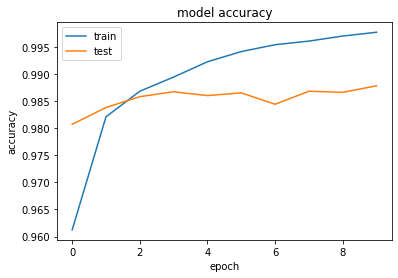

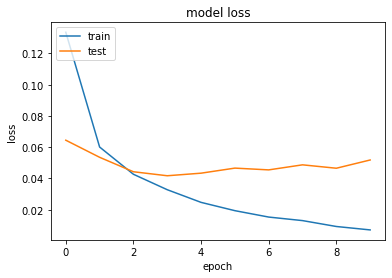

In [71]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Definir un  modele plus large


In [83]:
def large_model():
    # create model
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPooling2D((2, 2)))
    #model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [84]:
modellg= large_model()

In [85]:
print(modellg.summary())

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 9, 9, 64)          36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 100)             

In [86]:
historylg= modellg.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

Epoch 1/10
300/300 [==============================] - 48s 161ms/step - loss: 0.1991 - accuracy: 0.9397 - val_loss: 0.0597 - val_accuracy: 0.9822
Epoch 2/10
300/300 [==============================] - 48s 159ms/step - loss: 0.0545 - accuracy: 0.9836 - val_loss: 0.0368 - val_accuracy: 0.9877
Epoch 3/10
300/300 [==============================] - 47s 157ms/step - loss: 0.0367 - accuracy: 0.9883 - val_loss: 0.0339 - val_accuracy: 0.9893
Epoch 4/10
300/300 [==============================] - 47s 156ms/step - loss: 0.0273 - accuracy: 0.9911 - val_loss: 0.0367 - val_accuracy: 0.9882
Epoch 5/10
300/300 [==============================] - 49s 162ms/step - loss: 0.0202 - accuracy: 0.9934 - val_loss: 0.0356 - val_accuracy: 0.9895
Epoch 6/10
300/300 [==============================] - 50s 166ms/step - loss: 0.0159 - accuracy: 0.9950 - val_loss: 0.0342 - val_accuracy: 0.9892
Epoch 7/10
300/300 [==============================] - 49s 164ms/step - loss: 0.0131 - accuracy: 0.9959 - val_loss: 0.0394 - val_ac

In [87]:
# evaluate model
_ , acc = model.evaluate(X_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 98.780


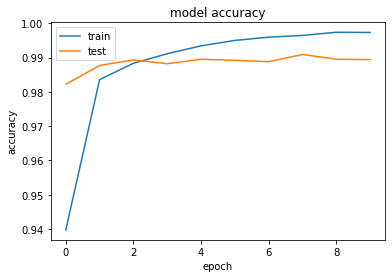

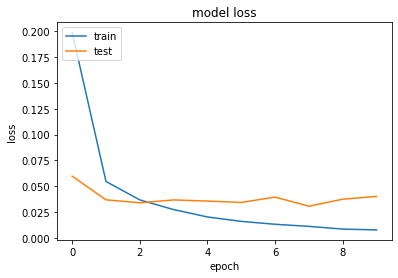

In [88]:
import matplotlib.pyplot as plt
plt.plot(historylg.history['accuracy'])
plt.plot(historylg.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(historylg.history['loss'])
plt.plot(historylg.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [89]:
# This function saves a model on the drive using two files : a json and an h5
def save_keras_model(model, filename):
    # serialize model to JSON
    model_json = model.to_json()
    with open(filename+".json", "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    model.save_weights(filename+".h5")

In [93]:
save_keras_model(modellg, 'modelmnist')

le json pour charger l’architecture du modèle de CNN <br/>
le h5 pour mettre à jour les variables du CNN et récupérer son entraînement 

In [96]:
# This function loads a model from two files : a json and a h5
# BE CAREFUL : the model NEEDS TO BE COMPILED before any use !
from keras.models import  model_from_json

def load_keras_model(filename):
    # load json and create model
    json_file = open(filename+".json", 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    # load weights into new model
    loaded_model.load_weights(filename+".h5")
    return loaded_model

In [97]:
mymodel= load_keras_model('modelmnist')

In [98]:
print(mymodel.summary())

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 9, 9, 64)          36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 100)             

Pour que le modèle soit utilisable, il ne reste plus qu’à le compiler 

In [99]:
 mymodel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

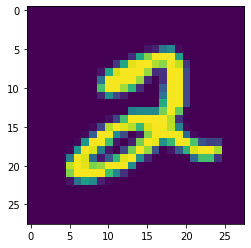

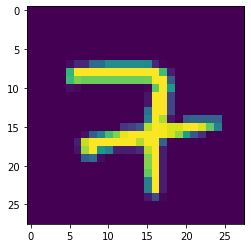

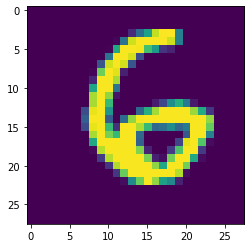

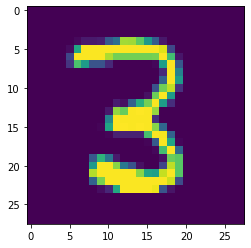

In [102]:
# A few random samples
use_samples = [5, 38, 3939, 27389]
samples_to_predict = []

# Generate plots for samples
for sample in use_samples:
  # Generate a plot
  reshaped_image = X_train[sample].reshape((28, 28))
  plt.imshow(reshaped_image)
  plt.show()
  # Add sample to array for prediction
  samples_to_predict.append(X_train[sample])

In [103]:
# Convert into Numpy array
samples_to_predict = np.array(samples_to_predict)
print(samples_to_predict.shape)

(4, 28, 28, 1)


In [104]:
# Generate predictions for samples
predictions = mymodel.predict(samples_to_predict)
print(predictions)

[[6.33004256e-14 1.97447735e-11 1.00000000e+00 1.17032006e-09
  9.49163708e-13 4.95582443e-14 5.89178839e-15 1.83715446e-10
  2.15886670e-10 9.14766093e-13]
 [7.07342063e-13 6.40891507e-10 2.15475120e-05 8.94719619e-07
  5.50653834e-09 3.60749056e-16 3.90540422e-17 9.99977589e-01
  9.49172851e-10 3.29179850e-10]
 [7.50532796e-12 5.00224201e-15 2.00855271e-15 7.50020411e-16
  1.02947835e-16 1.79236556e-11 1.00000000e+00 1.41081715e-16
  7.67172870e-12 6.43696208e-15]
 [4.73039155e-16 9.02211655e-14 3.18390778e-12 1.00000000e+00
  2.53429076e-20 1.06850993e-15 5.24757838e-18 6.44757880e-15
  3.87116623e-11 4.37743663e-15]]


In [105]:
# Generate arg maxes for predictions
classes = np.argmax(predictions, axis = 1)
print(classes)

[2 7 6 3]
